In [17]:
# some basic setup
# inspired by https://www.youtube.com/watch?v=Oieh4YFZZz0
# goals
# - get more comfortable with how a neural network works internally
# - get exposure to JAX

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
N_SAMPLES = 200
LAYERS = [1, 20, 20, 20, 1]
LR = .1
N_EPOCHS = 30000

In [6]:
# create dataset randomly
# random numbers in Jax need to be created differently
# they are randomly generated but deterministic - every time you rerun this you get the same value
key = jax.random.PRNGKey(64)

In [7]:
key, xkey, ynoisekey = jax.random.split(key, 3)  # splits the original key into 3 parts 
                                                 # seems to just be rng with `key` as a seed?
x_samples = jax.random.uniform(xkey,  # draw randomly from a uniform distribution
                               (N_SAMPLES, 1),  # get a data matrix of shape (N_SAMPLES, 1)
                               minval=0.0, maxval=2 * jnp.pi)
# create a target variable that's sin(x)
y_samples = jnp.sin(x_samples) + \
    jax.random.normal(ynoisekey,  # add random noise to it
                      (N_SAMPLES, 1)) * 0.3  # add a different amount of random noise to each value
                                             # multiply by roughly the sd of the normal dist 
                                             # you're drawing from (?)

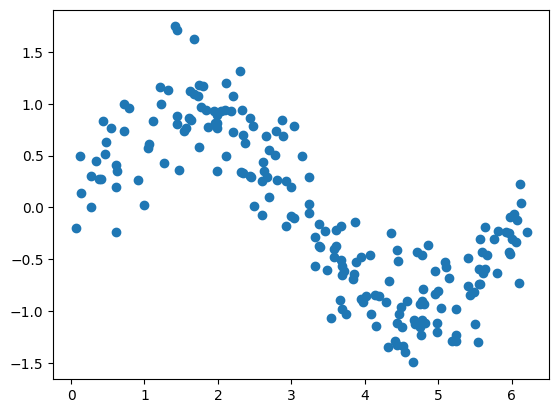

In [8]:
plt.scatter(x_samples, y_samples)
plt.show()

In [9]:
# weight initialization
weight_matrices = []  # 4 entries in each bc we have 4 layer transitions 
                      # (5 layers, 4 sets of connections)
bias_vectors = []
activation_functions = []

for (fan_in, fan_out) in zip(LAYERS[:-1], LAYERS[1:]):  # fan in = input dimension, fan out = hidden dimension
    kernel_matrix_uniform_limit = jnp.sqrt(6 /  # this 6 is from the Xavier Glorot Uniform init formula
                                           (fan_in + fan_out))

    key, wkey = jax.random.split(key)
    W = jax.random.uniform(wkey,  # draw from uniform distribution w xavier glorot uniform init
                           (fan_in, fan_out),
                           minval=-kernel_matrix_uniform_limit,
                           maxval=+kernel_matrix_uniform_limit,
                           )
    b = jnp.zeros(fan_out)

    # append all these things to their respective lists
    weight_matrices.append(W)
    bias_vectors.append(b)
    activation_functions.append(jax.nn.sigmoid)

activation_functions[-1] = lambda x: x  # we don't want a sigmoid here, just the value itself

In [10]:
def network_forward(x, weights, biases, activations):
    a = x  # a denotes the activated state in each layer
    for W, b, f in zip(
        weights, 
        biases,
        activations,
    ):
        a = f(a @ W + b)  # inputs = activation_func of inputs times weight matrix + biases
    return a

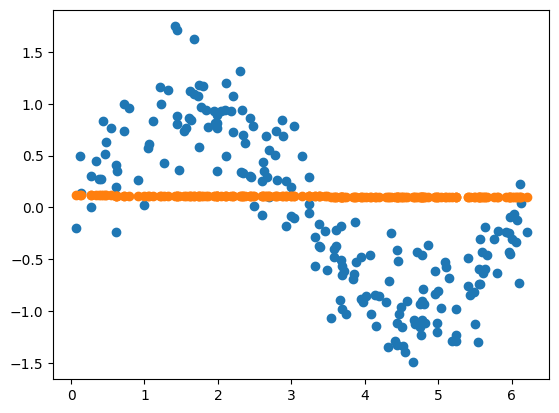

In [12]:
plt.scatter(x_samples, y_samples)
plt.scatter(x_samples, network_forward(x_samples, weight_matrices, bias_vectors, activation_functions))
plt.show()

In [15]:
def loss_forward(y_guess, y_ref):
    # this is the loss function the guy in the tutorial used
    # like a modified RMSE basically
    delta = y_guess - y_ref
    return .5 * jnp.mean(delta**2)

In [16]:
# test what we just made to make sure it works!
loss_forward(
    network_forward(x_samples, weight_matrices, bias_vectors, activation_functions),
    y_samples
)

Array(0.30838406, dtype=float32)

In [ ]:
# next we have to find the gradients of the error wrt the weights and biases
loss_and_grad_fun = jax.value_and_grad(
    
)